In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pytz

In [2]:
# Load the dataset
data_path = 'EVChargingStationUsage.csv'  # Update this path if needed
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_42307/3370982819.py:3: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


In [3]:
# Overview of the dataset
data.info()
print('-' * 100)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443790e+11
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483280e+10
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.705410e+11
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11


In [4]:
# Check for missing values
def check_missing_values(df):
    missing_cols = df.isnull().sum()
    print("Missing values per column:\n", missing_cols[missing_cols > 0])

    missing_rows = df.isnull().sum(axis=1)
    total_missing = df.isnull().sum().sum()

    print(f"\nTotal missing values: {total_missing}")
    print("Total number of rows with missing values:", len(missing_rows[missing_rows > 0]))
    print("Total number of columns with missing values:", len(missing_cols[missing_cols > 0]))
    return

check_missing_values(data)

Missing values per column:
 Transaction Date (Pacific Time)      209
Port Type                              9
EVSE ID                            78948
Currency                            1788
Ended By                             248
Driver Postal Code                  8402
User ID                             7677
County                             84665
System S/N                         78948
Model Number                       78948
dtype: int64

Total missing values: 339842
Total number of rows with missing values: 89969
Total number of columns with missing values: 10


In [5]:
# Drop columns with >8000 missing values
threshold = 8000
cols_to_drop = data.columns[data.isnull().sum() > threshold]
data = data.drop(columns=cols_to_drop)

# Replace missing 'Port Type' with the mode
if 'Port Type' in data.columns:
	data['Port Type'] = data['Port Type'].fillna(data['Port Type'].mode()[0])

# Replace missing 'Model Number' with 'Unknown'
if 'Model Number' in data.columns:
	data['Model Number'] = data['Model Number'].fillna('Unknown')

# Drop rows with missing 'User ID'
if 'User ID' in data.columns:
	data = data.dropna(subset=['User ID'])

	# Remove non-numeric 'User ID' values and convert to integer
	data = data[pd.to_numeric(data['User ID'], errors='coerce').notnull()]
	data['User ID'] = data['User ID'].astype(int)

# Drop remaining rows with missing values
data = data.dropna()

print("Remaining missing values after cleaning:")
check_missing_values(data)

Remaining missing values after cleaning:
Missing values per column:
 Series([], dtype: int64)

Total missing values: 0
Total number of rows with missing values: 0
Total number of columns with missing values: 0


In [6]:
# Convert datetime columns to datetime objects
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')  # Handle invalid values
data['Transaction Date (Pacific Time)'] = pd.to_datetime(data['Transaction Date (Pacific Time)'], errors='coerce')

# Convert time durations to timedelta
data['Total Duration (hh:mm:ss)'] = pd.to_timedelta(data['Total Duration (hh:mm:ss)'])
data['Charging Time (hh:mm:ss)'] = pd.to_timedelta(data['Charging Time (hh:mm:ss)'])

# Convert durations to minutes
data['Total Charging Time (min)'] = data['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60
data['Total Duration (min)'] = data['Total Duration (hh:mm:ss)'].dt.total_seconds() / 60

# Calculate energy usage per minute
data['kWh per min'] = data['Energy (kWh)'] / data['Total Charging Time (min)']

# Add day of the week
data['Day of week'] = data['Start Date'].dt.dayofweek

# Map time zones
tz_mapping = {
    'PDT': 'US/Pacific',
    'PST': 'US/Pacific',
    'UTC': 'UTC'
}

# Localize and convert times to UTC
def localize_to_timezone(row, datetime_col, tz_col):
    tz_name = row[tz_col]  # Get timezone string
    timezone = pytz.timezone(tz_mapping.get(tz_name))  # Map to pytz timezone string
    return row[datetime_col].tz_localize(timezone, ambiguous='NaT', nonexistent='NaT') # Localize datetime

data['Start Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'Start Date', 'Start Time Zone'), axis=1)
data['End Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'End Date', 'End Time Zone'), axis=1)
data['Start Date UTC'] = pd.to_datetime(data['Start Date Localized'], utc=True)
data['End Date UTC'] = pd.to_datetime(data['End Date Localized'], utc=True)

In [7]:
# Split events into multiple rows for each hour
def count_minutes(start_date, current_hour, total_time, minutes_):
    if (start_date.replace(minute=0, second=0) == current_hour):
        if ((60 - start_date.minute) > total_time):
            _min_in_hour = total_time
        else:
            _min_in_hour = 60 - start_date.minute
    elif ((minutes_ + 60) <= total_time):
        _min_in_hour = 60
    elif ((minutes_ + 60) > total_time):
        _min_in_hour = total_time - minutes_
    else:
        print("You missed something :P")
    return _min_in_hour

def split_event_into_hours(row):
    start_date = row['Start Date UTC']
    end_date = row['End Date UTC']
    total_charging_time = row['Total Charging Time (min)']
    total_duration = row['Total Duration (min)']
    kWh_per_min = row['kWh per min']
    
    hourly_rows = []
    minutes_charged = 0
    minutes_occupied = 0
    current_hour = start_date.replace(minute=0, second=0)
    
    while current_hour < end_date:
        charging_min_in_hour = count_minutes(start_date, current_hour, total_charging_time, minutes_charged)
        occupied_min_in_hour = count_minutes(start_date, current_hour, total_duration, minutes_occupied)
        
        hourly_energy = charging_min_in_hour * kWh_per_min
        hourly_occupation = occupied_min_in_hour / 60  # Convert to hours
        
        hourly_rows.append({
            'Date UTC': current_hour,
            'Charging Time (min)': charging_min_in_hour,
            'Duration (min)': occupied_min_in_hour,
            'Hourly Energy Consumption (kWh)': hourly_energy,
            'Hourly Charger Occupation (h)': hourly_occupation
        })

        minutes_charged += charging_min_in_hour
        minutes_occupied += occupied_min_in_hour
        current_hour += pd.Timedelta(hours=1)

    return pd.DataFrame(hourly_rows)

hourly_data = pd.concat(data.apply(split_event_into_hours, axis=1).tolist(), ignore_index=True)

In [8]:
# One-hot encode categorical variables if they exist
categorical_columns = ['Model Number', 'Port Type']
existing_categorical_columns = [col for col in categorical_columns if col in data.columns]
encoded_data = pd.get_dummies(data, columns=existing_categorical_columns)

# Ensure only numeric columns are passed to the scaler, excluding timedelta columns
numeric_columns = encoded_data.select_dtypes(include=[np.number]).columns
timedelta_columns = encoded_data.select_dtypes(include=[np.timedelta64]).columns
numeric_columns = numeric_columns.difference(timedelta_columns)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_data[numeric_columns])

scaled_data = pd.DataFrame(scaled_features, columns=numeric_columns)

# Display scaled data
print("Scaled Data for Clustering:")
scaled_data

Scaled Data for Clustering:


,Day of week,Energy (kWh),Fee,GHG Savings (kg),Gasoline Savings (gallons),Latitude,Longitude,Plug In Event Id,Port Number,Postal Code,Total Charging Time (min),Total Duration (min),User ID,kWh per min
0,0.592782,-0.321099,-0.576508,-0.321023,-0.321441,0.525317,-0.593691,-0.292270,0.836416,-0.683030,-0.069689,0.263348,-0.388685,-0.566990
1,1.112076,-1.184034,-0.576508,-1.183956,-1.184454,0.525317,-0.593691,-0.292270,0.836416,-0.683030,-1.435104,-1.112155,-0.388440,-0.521396
2,1.112076,0.901382,-0.576508,0.901467,0.900881,0.525317,-0.593691,-0.292270,0.836416,-0.683030,1.676395,0.824365,-0.388440,-0.452342
3,1.112076,-0.193238,-0.576508,-0.193255,-0.192717,0.525317,-0.593691,-0.292270,0.836416,-0.683030,0.038871,-0.192542,-0.388889,-0.447038
4,1.112076,-0.923985,-0.576508,-0.924073,-0.923648,0.525317,-0.593691,-0.292270,0.836416,-0.683030,-0.923758,-0.586770,-0.388552,-0.923846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249874,0.073489,-0.940388,-0.355578,-0.940462,-0.940438,-1.127333,0.458645,-0.292264,0.836416,1.888119,-1.028462,-0.857170,0.170100,-0.659452
249875,0.073489,0.591238,1.890538,0.591078,0.590823,0.909958,-0.461907,-0.292252,0.836416,-0.683030,0.174012,0.562683,-0.322497,0.841626
249876,0.073489,2.968259,3.010966,2.968159,2.968306,-1.802837,2.433992,-0.292269,-1.195578,0.345429,2.294068,6.818910,-0.265169,0.883443
249877,0.073489,0.483352,0.870054,0.483379,0.483366,0.909958,-0.461907,-0.292252,-1.195578,-0.683030,1.387038,0.733642,-0.167266,-0.691213


# Stations

## Grouping user data by charging time and energy consumption

In [9]:
# Set 'Start Date' as the index
d = data.set_index('Start Date')

d['date'] = d.index.date
d['hour'] = d.index.hour

hourly_energy = d.groupby(['Station Name', 'date', 'hour'])['Energy (kWh)'].sum().reset_index()

# Pivot table: Rows -> Station Name, Columns -> Hour, Values -> Energy (kWh)
user_hourly = hourly_energy.pivot_table(index='Station Name', columns='hour', values='Energy (kWh)', fill_value=0)
user_hourly.columns = [f"{col}" for col in user_hourly.columns]
user_hourly

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Station Name,,,,,,,,,,,,,,,,,,,,,
PALO ALTO CA / BRYANT # 1,2.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.064000,...,0.000000,0.000000,5.430000,0.000000,6.056500,0.000000,0.000000,0.000000,0.000000,0.000000
PALO ALTO CA / BRYANT #1,15.968664,22.920030,17.281937,19.273235,8.977538,8.237422,10.695799,9.067433,7.837912,7.772147,...,7.846299,7.759604,7.099480,6.844059,7.485997,6.896378,7.236293,9.083855,11.198523,12.281231
PALO ALTO CA / BRYANT #2,12.005408,12.962444,9.358428,17.164327,9.626071,8.833433,11.026872,8.814730,7.614132,8.528849,...,7.773904,7.247889,7.150788,6.778468,6.864802,6.877051,7.605781,9.012788,11.404069,14.575329
PALO ALTO CA / BRYANT #3,24.623062,14.947686,9.709064,0.000000,4.979555,5.367642,7.677478,11.166891,9.267048,10.936971,...,8.880367,7.803310,7.331116,7.764661,7.219015,7.071632,7.867320,11.480586,15.324031,10.140800
PALO ALTO CA / BRYANT #4,9.296000,19.965000,33.159000,0.000000,0.000000,6.788706,9.211122,10.468636,16.138888,14.694743,...,10.269243,9.287012,7.769357,9.102062,8.182677,8.304272,7.102169,11.575231,12.165000,6.071000
PALO ALTO CA / BRYANT #5,18.718667,0.000000,25.019500,0.000000,0.000000,6.980000,7.897179,11.588824,12.208404,12.444212,...,10.380880,8.482993,8.475506,8.453668,8.490078,9.135644,7.238906,13.340155,8.648737,13.538000
PALO ALTO CA / BRYANT #6,22.538167,15.949000,0.000000,23.027000,5.014833,6.742611,11.949845,12.557527,12.119712,11.264811,...,10.251077,8.223371,9.023653,8.317387,8.458419,6.678081,9.556213,11.604959,16.915061,19.481556
PALO ALTO CA / CAMBRIDGE #1,13.862013,16.623269,9.093633,7.183020,2.767345,4.828301,8.461780,10.464258,10.190193,8.582207,...,8.811890,7.718795,7.753066,7.266688,7.122498,7.275176,7.873886,9.370124,9.831519,13.435983
PALO ALTO CA / CAMBRIDGE #2,16.819531,2.131471,16.385500,10.406492,2.924780,4.898910,10.305468,11.064187,9.619833,7.771894,...,8.947710,7.704460,6.742162,7.238289,6.797411,7.284378,8.134108,8.447836,13.998906,10.932967


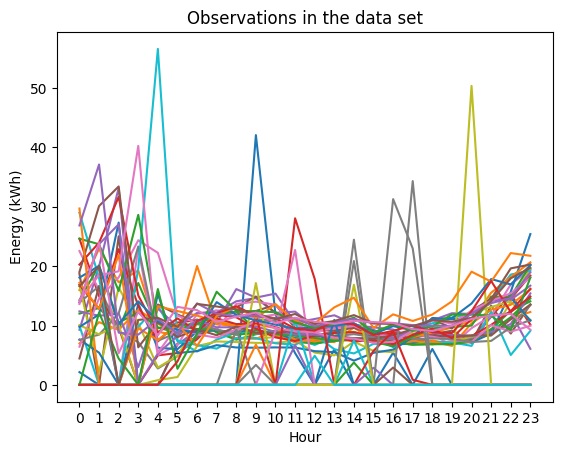

In [10]:
plt.plot(user_hourly.T)
plt.title('Observations in the data set')
plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.show()

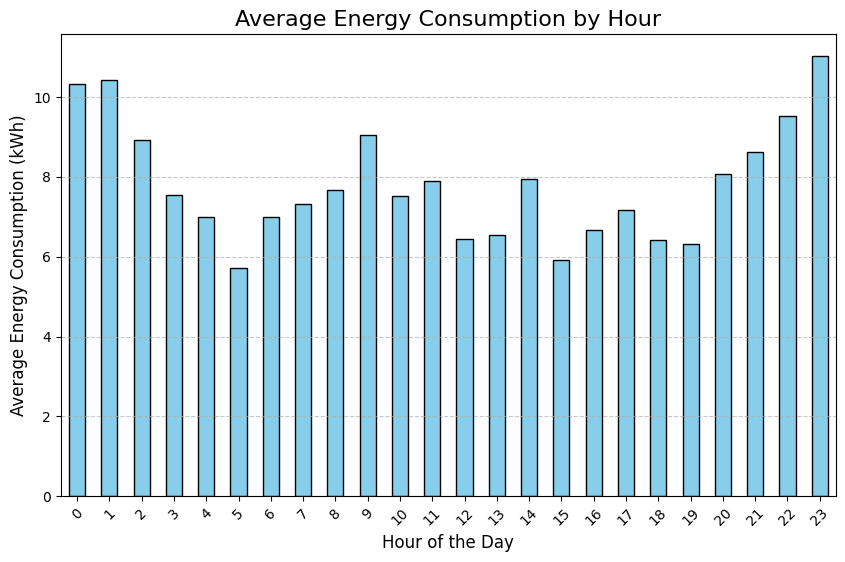

In [11]:
# Calculate the average energy consumption per hour across all users
hourly_avg_energy = user_hourly.mean(axis=0)

# Plot the bar chart
plt.figure(figsize=(10, 6))
hourly_avg_energy.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Energy Consumption by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Energy Consumption (kWh)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


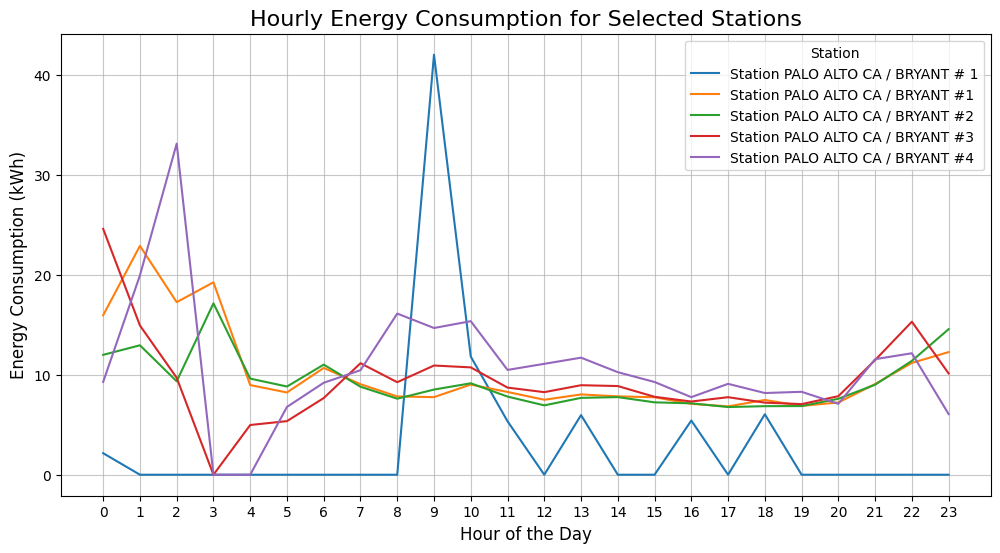

In [12]:
# Select a subset of users (e.g., first 5 users)
subset_station = user_hourly.head(5)

# Plot energy consumption for selected users
plt.figure(figsize=(12, 6))
for station_name in subset_station.index:
    plt.plot(subset_station.columns, subset_station.loc[station_name], label=f"Station {station_name}")

plt.title("Hourly Energy Consumption for Selected Stations", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.legend(title="Station")
plt.grid(alpha=0.7)
plt.show()


# Model number and port type
---

## Data preparation for Model number and port type

#### Missing values

In [13]:
print(data.columns)

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'Address 1', 'City', 'State/Province', 'Postal Code', 'Country',
       'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'User ID', 'Total Charging Time (min)',
       'Total Duration (min)', 'kWh per min', 'Day of week',
       'Start Date Localized', 'End Date Localized', 'Start Date UTC',
       'End Date UTC'],
      dtype='object')


In [14]:
# Check if 'Model Number' exists in the DataFrame
if 'Model Number' not in data.columns:
    print("The 'Model Number' column is missing. Adding it with default values.")
    # Add the 'Model Number' column with a default value of 'Unknown'
    data['Model Number'] = 'Unknown'

# If 'Model Number' exists, handle missing values
data['Model Number'] = data['Model Number'].fillna('Unknown')

# Verify that the column has been restored and no missing values remain
print(data['Model Number'].isnull().sum())  # Should print 0
print(data['Model Number'].head())  # Show the first few values for verification

The 'Model Number' column is missing. Adding it with default values.
0
0    Unknown
1    Unknown
2    Unknown
3    Unknown
4    Unknown
Name: Model Number, dtype: object


In [15]:
# Keep only necessary columns
focused_data = data[['User ID', 'Model Number', 'Port Type']]

# Sort the data by 'User ID'
focused_data = focused_data.sort_values(by='User ID')
focused_data

,User ID,Model Number,Port Type
40166,0,Unknown,Level 2
5244,0,Unknown,Level 2
32517,0,Unknown,Level 2
32462,0,Unknown,Level 2
5236,0,Unknown,Level 2
...,...,...,...
259227,23065631,Unknown,Level 2
259405,23082221,Unknown,Level 2
259263,23099981,Unknown,Level 2
259372,23127081,Unknown,Level 2


In [17]:
# Check if there are missing values in the focused dataset
model_port_focused_data = focused_data.isnull().sum()
model_port_focused_data

User ID         0
Model Number    0
Port Type       0
dtype: int64

#### Feature Engineering:

Prepare meaningful features for clustering. 

> Since the focus is on Model Number and Port Type, we need to represent these categorical variables numerically, whoch is done using one-hot encoding.

In [22]:
# One-hot encode 'Model Number' and 'Port Type'
one_hot_encoded_data = pd.get_dummies(focused_data, columns=['Model Number', 'Port Type'])

# Aggregate features by User ID
aggregated_data = one_hot_encoded_data.groupby('User ID').sum()

# Display the first few rows of the feature-engineered dataset
print("Feature Engineered Dataset for Clustering:")
print(aggregated_data.head())

Feature Engineered Dataset for Clustering:
         Model Number_Unknown  Port Type_Level 1  Port Type_Level 2
User ID                                                            
0                         226                  1                225
102                         2                  0                  2
107                        11                  1                 10
111                        19                  1                 18
140                         4                  1                  3


> One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The code above tells the algorithm that there is no ordinal relationship between the categories.

### Scaling:

In [23]:
# Exclude 'User ID' from scaling
features_to_scale = aggregated_data.drop(columns=['User ID'], errors='ignore')

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create a DataFrame with scaled features
scaled_data = pd.DataFrame(scaled_features, index=aggregated_data.index, columns=features_to_scale.columns)

# Display the scaled dataset
print("Scaled Dataset for Clustering:")
print(scaled_data.head())

Scaled Dataset for Clustering:
         Model Number_Unknown  Port Type_Level 1  Port Type_Level 2
User ID                                                            
0                    4.797633           0.183791           4.883995
102                 -0.217353          -0.048514          -0.217308
107                 -0.015858           0.183791          -0.034302
111                  0.163249           0.183791           0.148704
140                 -0.172576           0.183791          -0.194433


In [24]:
scaled_data.describe()

,Model Number_Unknown,Port Type_Level 1,Port Type_Level 2
count,2.134200e+04,2.134200e+04,2.134200e+04
mean,1.065381e-17,-5.326906e-18,-2.130763e-17
std,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.397415e-01,-4.851388e-02,-2.630599e-01
25%,-2.397415e-01,-4.851388e-02,-2.401841e-01
50%,-2.173531e-01,-4.851388e-02,-2.173083e-01
75%,-1.501881e-01,-4.851388e-02,-1.486809e-01
max,2.470086e+01,8.288435e+01,2.517483e+01


> The data is scaled so that the model can learn the patterns in the data. If the data is not scaled, the model may not learn the patterns in the data and may give a biased output.

## **Mandatory Component**
---

### **1: Cluster**

### Clustering: K-means for model number and port type

In [29]:
# Assuming 'aggregated_data' and 'scaled_data' were previously defined:
# Reapply K-Means clustering
optimal_k = 3  # Based on the elbow plot observation
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original aggregated dataset
aggregated_data['Cluster'] = clusters

# Analyze the clusters
cluster_summary = aggregated_data.groupby('Cluster').mean()

# Display the cluster summary
print("Clustered Data Sample:")
print(aggregated_data.head())

Clustered Data Sample:
         Model Number_Unknown  Port Type_Level 1  Port Type_Level 2  Cluster
User ID                                                                     
0                         226                  1                225        1
102                         2                  0                  2        0
107                        11                  1                 10        0
111                        19                  1                 18        0
140                         4                  1                  3        0


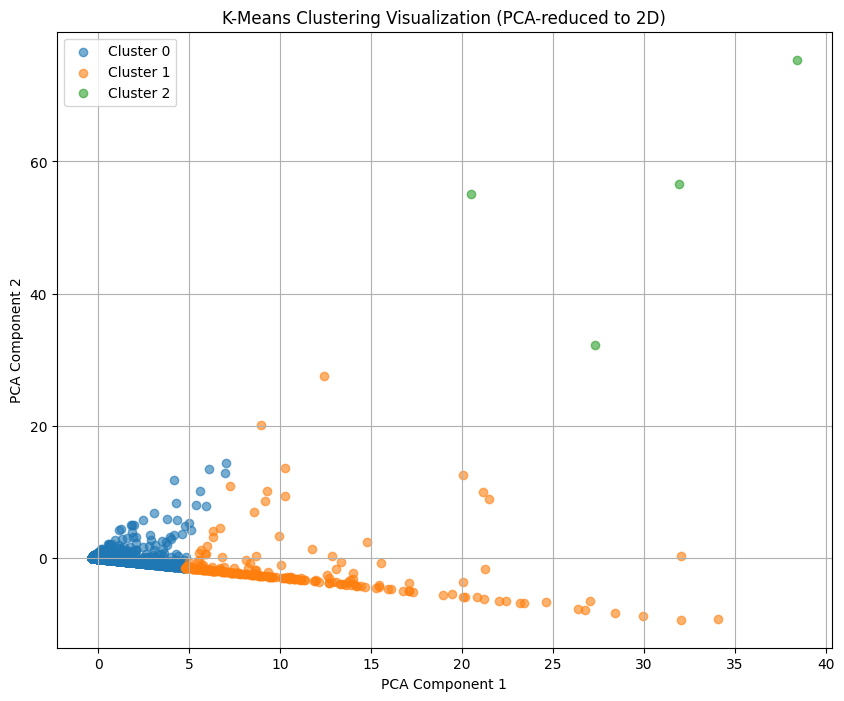

In [30]:
# Reduce the dimensions of the scaled data to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_points = reduced_data[aggregated_data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-Means Clustering Visualization (PCA-reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()

## **Exploratory Component**
---

### **1: Infrastructure planning**

### **2: Campaigns to increase**